In [23]:
import pandas as pd

# Load the dataset with the correct separator
df = pd.read_csv('/kaggle/input/student-dataset/student-mat.csv', sep=';')

# Display the first few rows
df.head(20)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [24]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [25]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [26]:
df.shape

(395, 33)

In [27]:
df = df.drop_duplicates()
df = df.fillna(df.median(numeric_only = True))
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [28]:
import numpy as np
average_g3 = np.mean(df['G3'])
average_g3

10.415189873417722

In [29]:
above_15_count = (df['G3'] > 15).sum()
above_15_count

40

In [30]:
correlation = np.corrcoef(df['studytime'], df['G3'])[0, 1]
correlation


0.0978196896531963

In [31]:
average_by_gender = df.groupby('sex')['G3'].mean()
average_by_gender

sex
F     9.966346
M    10.914439
Name: G3, dtype: float64

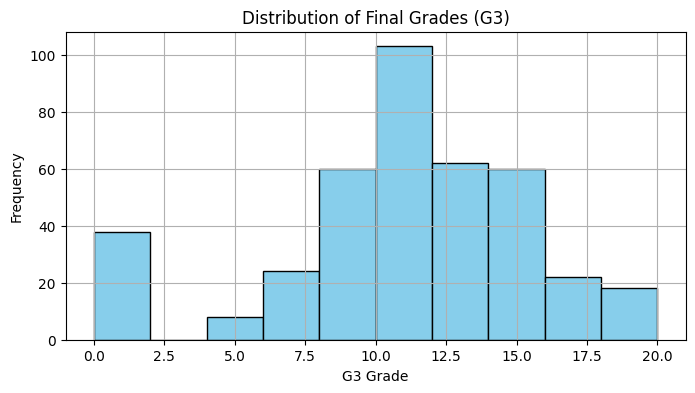

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of G3
plt.figure(figsize=(8, 4))
plt.hist(df['G3'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('G3 Grade')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

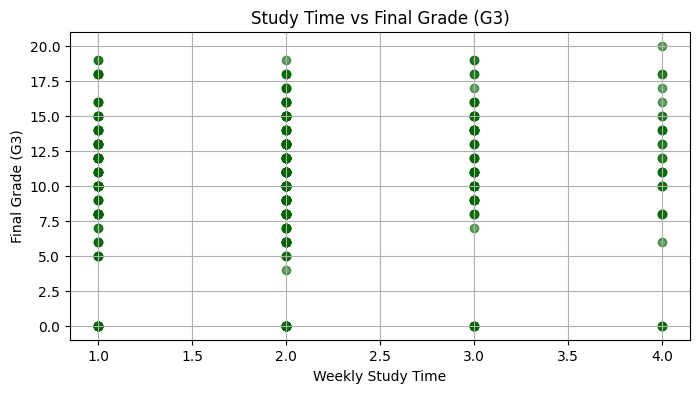

In [33]:
# Scatter plot between study time and G3
plt.figure(figsize=(8, 4))
plt.scatter(df['studytime'], df['G3'], alpha=0.6, color='darkgreen')
plt.title('Study Time vs Final Grade (G3)')
plt.xlabel('Weekly Study Time')
plt.ylabel('Final Grade (G3)')
plt.grid(True)
plt.show()

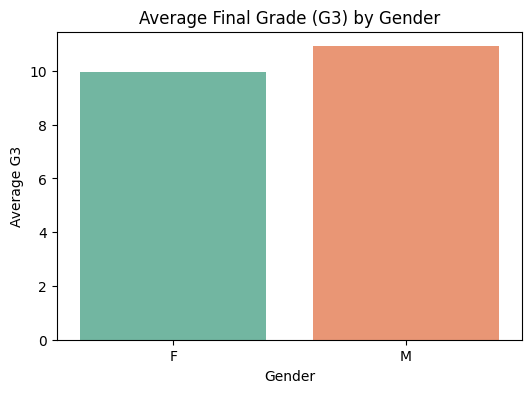

In [34]:
# Bar chart: average G3 by gender
plt.figure(figsize=(6, 4))
sns.barplot(x=average_by_gender.index, y=average_by_gender.values, palette='Set2')
plt.title('Average Final Grade (G3) by Gender')
plt.xlabel('Gender')
plt.ylabel('Average G3')
plt.show()